In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pyspark.sql.functions as f
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


spark = SparkSession.builder.appName('MSD').getOrCreate()

df = spark.read.format("parquet").options(inferSchema=True).load("hdfs:/user/yxl13-kkr16/NumSongDataset.parquet")

years = []
popularities = []
artisthotness = []
artistfamiliarities = []
tempos = []
durations = []
loudnesses = []
ArtistLatitude = []
ArtistLongitude = []
End_of_fade_in = []
keys = []
modes = []

print("start_exacted")
size = df.select('Year').count()
for i in range(0, size):
    year = df.select("Year").collect()[i][0]
    popularity = df.select("Popularity").collect()[i][0]
    artisthottest = df.select("ArtistHotness").collect()[i][0]
    artistfamiliarity = df.select("ArtistFamiliarity").collect()[i][0]
    tempo = df.select("Tempo").collect()[i][0]
    loudness = df.select("Loudness").collect()[i][0]
    duration = df.select("Duration").collect()[i][0]
    latitude = df.select("ArtistLatitude").collect()[i][0]
    longitude = df.select("ArtistLongitude").collect()[i][0]
    fade_in = df.select("End_of_fade_in").collect()[i][0]
    key = df.select("Key").collect()[i][0]
    mode = df.select("Mode").collect()[i][0]
    years.append(year)
    popularities.append(popularity)
    artisthotness.append(artisthottest)
    artistfamiliarities.append(artistfamiliarity)
    tempos.append(tempo)
    loudnesses.append(loudness)
    durations.append(duration)
    ArtistLatitude.append(latitude)
    ArtistLongitude.append(longitude)
    End_of_fade_in.append(fade_in)
    keys.append(key)
    modes.append(mode)
print(len(modes))
print(len(years))
print()

print("---------------------------------------")


def CorrelationMartix(popularities, artisthotness, artistfamiliarities, tempos, loudnesses, durations, years ,
                      ArtistLatitude, ArtistLongitude, End_of_fade_in, keys, modes):
    print("start_heatmap")
    Alllist = [popularities, artisthotness, artistfamiliarities, tempos, loudnesses, durations, years, ArtistLatitude,
               ArtistLongitude, End_of_fade_in, keys, modes]

    column_lst = ['popularity', 'artisthotness', 'artistfamiliarity', 'tempo', 'loudness', 'duration', 'year',
                  'ArtistLatitude', 'ArtistLongitude', 'End_of_fade_in', 'keys', 'modes']

    data_dict = {}  # use a dictionary
    for col, gf_lst in zip(column_lst, Alllist):
        data_dict[col] = gf_lst

    unstrtf_df = pd.DataFrame(data_dict)
    cor1 = unstrtf_df.corr()  # use pandas corr calculate the correction
    print(cor1)
    return cor1

cor = CorrelationMartix(popularities, artisthotness, artistfamiliarities, tempos, loudnesses, durations, years,
                        ArtistLatitude, ArtistLongitude, End_of_fade_in, keys, modes)
fig = plt.figure()
ax = fig.add_subplot(figsize=(110, 110))
ax = sns.heatmap(cor, annot=True, vmax=1, square=True, cmap="RdBu_r")
ax.set_title('characteristic_correlation')



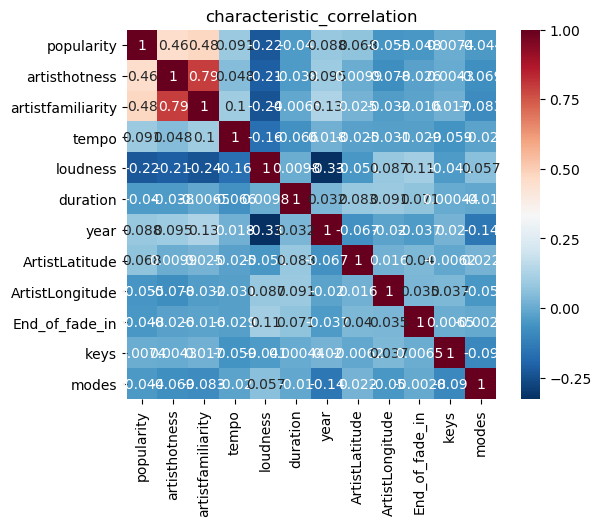

In [2]:
display(fig)


---------------------------------------
---------------------------------------


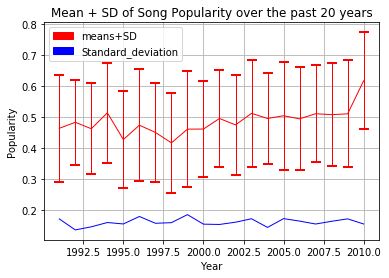

In [4]:
import numpy as np
import matplotlib.patches as mpatches

size20 = df.filter(df.Year > 1990).count()  # number of songs created in the past 10 years
years = []
for i in range(0, size20):
    year = df.select("Year").filter(df.Year > 1990).collect()[i][0]
    years.append(year)
# print(len(years))

unique_years = set(years)
unique_years = list(unique_years)
unique_years.sort()

# print(df.filter(df.Year > 2000).count())
print("---------------------------------------")


def analysis(one_years, target):
    listtarget = []

    for i in range(0, len(one_years)):
        oneyeartarget = df.select(target).filter(df.Year == one_years[i])
        # print("For year:", unique_years[i])
        listtarget.append([one_years[i]])
        a = []
        for j in range(0, oneyeartarget.count()):
            field_value = oneyeartarget.collect()[j][0]
            a.append(field_value)
            # print(year_tempos)
        # mean = sum / oneyeartarget.count()
        listtarget[i].append(a)

    listtarget = dict(listtarget)
    # print(listtarget)
    return listtarget


loudness = analysis(unique_years, "Loudness")
artisthotness = analysis(unique_years, "ArtistHotness")
popularity = analysis(unique_years, "Popularity")
artistfamiliarity = analysis(unique_years,"ArtistFamiliarity")

avg = []
Var = []
SD = []
data = []
year = []
for keys, values in popularity.items():
    avg.append(np.average(values))
    Var.append(np.var(values))
    SD.append(np.std(values, ddof=1))
    data.append(values)
    year.append(keys)

# print(avg)
# # print(Var)
# print(SD)
# print(year)
# print(data)
print("---------------------------------------")

fig1 = plt.figure().add_subplot(111)
# fig1.plot(year, Var, 'g', linewidth=1)
fig1.plot(year, SD, 'b', linewidth=1)
fig1.errorbar(year, avg, SD, capsize=5, elinewidth=1, markeredgewidth=2, ecolor='red', fmt='r', linewidth=1,
              capthick=0.5)
red_patch = mpatches.Patch(color='red', label='means+SD')
# green_patch = mpatches.Patch(color='green', label='Variance')
blue_patch = mpatches.Patch(color='blue', label='Standard_deviation')
fig1.legend(handles=[red_patch, blue_patch])
fig1.set_xlabel("Year")
fig1.set_ylabel("Popularity")
fig1.title.set_text("Mean + SD of Song Popularity over the past 20 years")
fig1.grid(True)

---------------------------------------


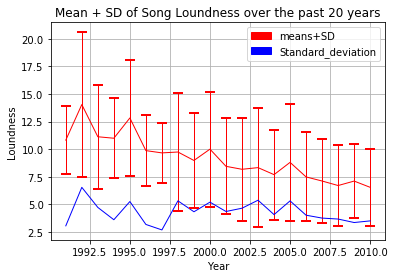

In [5]:
avg1 = []
Var1 = []
SD1 = []
data1 = []
year1 = []
for keys, values in loudness.items():
    avg1.append(np.average(values))
    Var1.append(np.var(values))
    SD1.append(np.std(values, ddof=1))
    data1.append(values)
    year1.append(keys)
# print(Var1)

print("---------------------------------------")

fig2 = plt.figure().add_subplot(111)
# fig2.plot(year1, Var1, 'g', linewidth=1)
fig2.plot(year1, SD1, 'b', linewidth=1)
fig2.errorbar(year1, avg1, SD1, capsize=5, elinewidth=1, markeredgewidth=2, ecolor='red', fmt='r', linewidth=1,
              capthick=0.5)
red_patch = mpatches.Patch(color='red', label='means+SD')
# green_patch = mpatches.Patch(color='green', label='Variance')
blue_patch = mpatches.Patch(color='blue', label='Standard_deviation')
fig2.legend(handles=[red_patch, blue_patch])
fig2.set_xlabel("Year")
fig2.set_ylabel("Loundness")
fig2.title.set_text("Mean + SD of Song Loundness over the past 20 years")
fig2.grid(True)

In [6]:
avg1 = []
Var1 = []
SD1 = []
data1 = []
year1 = []
for keys, values in artisthotness.items():
    avg1.append(np.average(values))
    Var1.append(np.var(values))
    SD1.append(np.std(values, ddof=1))
    data1.append(values)
    year1.append(keys)
# print(Var1)

print("---------------------------------------")

fig2 = plt.figure().add_subplot(111)
# fig2.plot(year1, Var1, 'g', linewidth=1)
fig2.plot(year1, SD1, 'b', linewidth=1)
fig2.errorbar(year1, avg1, SD1, capsize=5, elinewidth=1, markeredgewidth=2, ecolor='red', fmt='r', linewidth=1,
              capthick=0.5)
red_patch = mpatches.Patch(color='red', label='means+SD')
# green_patch = mpatches.Patch(color='green', label='Variance')
blue_patch = mpatches.Patch(color='blue', label='Standard_deviation')
fig2.legend(handles=[red_patch, blue_patch])
fig2.set_xlabel("Year")
fig2.set_ylabel("Artist hotness")
fig2.title.set_text("Mean + SD of Artist hotness over the past 20 years")
fig2.grid(True)

---------------------------------------


In [7]:
avg1 = []
Var1 = []
SD1 = []
data1 = []
year1 = []
for keys, values in artistfamiliarity.items():
    avg1.append(np.average(values))
    Var1.append(np.var(values))
    SD1.append(np.std(values, ddof=1))
    data1.append(values)
    year1.append(keys)
# print(Var1)

print("---------------------------------------")

fig2 = plt.figure().add_subplot(111)
# fig2.plot(year1, Var1, 'g', linewidth=1)
fig2.plot(year1, SD1, 'b', linewidth=1)
fig2.errorbar(year1, avg1, SD1, capsize=5, elinewidth=1, markeredgewidth=2, ecolor='red', fmt='r', linewidth=1,
              capthick=0.5)
red_patch = mpatches.Patch(color='red', label='means+SD')
# green_patch = mpatches.Patch(color='green', label='Variance')
blue_patch = mpatches.Patch(color='blue', label='Standard_deviation')
fig2.legend(handles=[red_patch, blue_patch])
fig2.set_xlabel("Year")
fig2.set_ylabel("Artist familiarity")
fig2.title.set_text("Mean + SD of artist familiarity over the past 20 years")
fig2.grid(True)

---------------------------------------


+-------------------+--------+-------------------+-------------------+----+
|         Popularity|Loudness|      ArtistHotness|  ArtistFamiliarity|Year|
+-------------------+--------+-------------------+-------------------+----+
| 0.6665278462297023|   4.264| 0.5418889720336469|  0.839962768151037|2004|
|  0.450992311636255|   7.469| 0.3931219335710068| 0.5278650761586818|2007|
| 0.5287824809425877|   2.022| 0.4675384440100101| 0.6686745328613157|2003|
| 0.5101193140330347|  15.663| 0.4427658420289504| 0.6610801676039384|1995|
|0.48213758506501503|   6.944| 0.4666288889016846| 0.7011808736075507|2004|
| 0.4348380902608562|  12.009|0.42791424698295477| 0.6697261875661445|2009|
| 0.6104742577715245|   13.33| 0.3835242473277272|  0.548585130198109|1995|
| 0.6859402266976852|   5.907| 0.7888059351620142| 0.8457688664485438|2003|
|0.23773394162247466|   9.161|0.36366811024462387| 0.6178701163443497|1997|
| 0.6355366486226686|  12.951| 0.5984585009824434| 0.9057768886660886|2000|
| 0.38272328

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


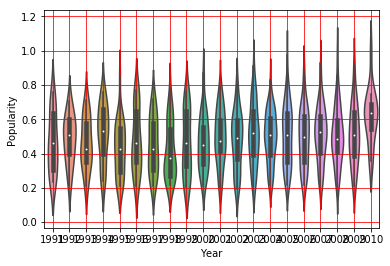

In [8]:
df1 = df.select('Popularity', 'Loudness', 'ArtistHotness', 'ArtistFamiliarity', 'Year').filter(df['Year'] > 1990)
df1.show()

pandas_df = df1.toPandas()

print("--------------------------------------")

fig, axes = plt.subplots()

ax1 = sns.violinplot(x="Year", y="Popularity", data=pandas_df, inner="box")
ax1.grid(True, color="r")


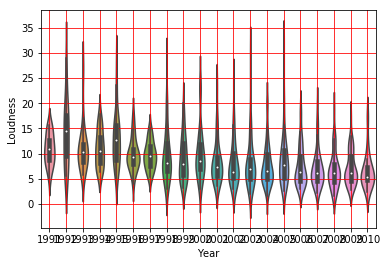

In [9]:
ax2 = sns.violinplot(x="Year", y="Loudness", data=pandas_df, inner="box")
ax2.grid(True, color="r")

In [12]:
ax3 = sns.violinplot(x="Year", y="ArtistHotness", data=pandas_df, inner="box")
ax3.grid(True, color="r")


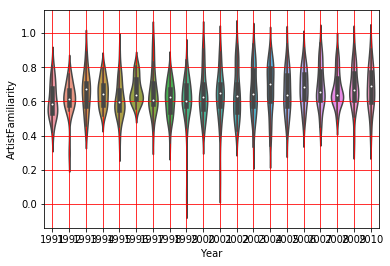

In [13]:
ax4 = sns.violinplot(x="Year", y="ArtistFamiliarity", data=pandas_df, inner="box")
ax4.grid(True, color="r")